In [1]:
using Pkg
Pkg.activate(".")
using Plots # Let's use the default plotting library

In [2]:
x = LinRange(-2,4,100) # Like Matlab's linspace

100-element LinRange{Float64}:
 -2.0,-1.93939,-1.87879,-1.81818,…,3.75758,3.81818,3.87879,3.93939,4.0

now let's assume we want to plot a function

In [3]:
f(x,β) = cos(β*x)*sin(3*β*x + 1)

f (generic function with 1 method)

Note, I didn't have to include the periods on each binary operator.  Instead I can use a period when I call the function `f`

In [4]:
f.([1,1.5,3], √π )

3-element Array{Float64,1}:
 -0.006843948752659984
 -0.38421709824394895 
 -0.5386614859122603  

In [5]:
y = f.(x, 2);

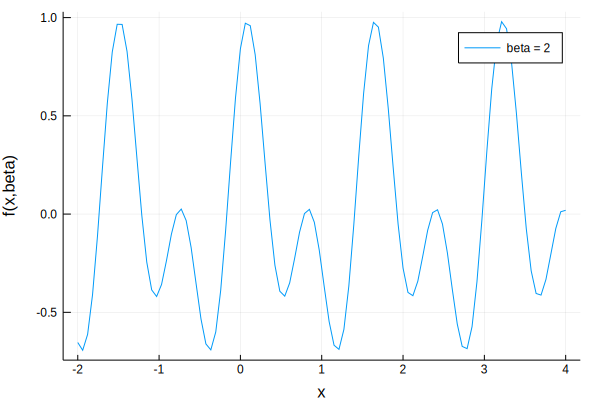

In [6]:
plt = plot( x, y, 
    xlabel = "x",
    ylabel = "f(x,beta)",
    label = "beta = 2")

Now I'll add a second line to the graph (which I should do in the cell above, but I want to illustrate I don't have to).  Note I used the `!` version of `plot` to indicate an inplace change to the current plot.  Also, I've added the optional argument `plt` (saved from before) to explicitly modify the previous plot.  We could have multiple plots and interact with them however/whenever we need to using this type of pattern.

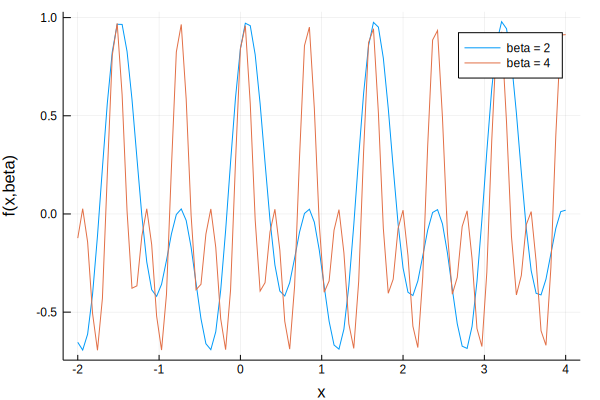

In [7]:
plot!(plt, x, f.(x,4), label = "beta = 4")

## Log plots
Now let's make a log plot

In [8]:
G(s,ζ) = 1/(s^2 + 2*ζ*s + 1)
M(ω,ζ) = 20*log10( abs(G(1im*ω, ζ)) )
ωr = 10 .^ LinRange(-1, 1, 100) # like logspace in Matlab
;

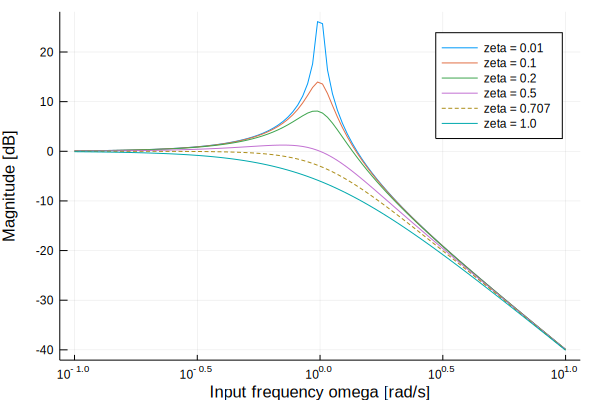

In [9]:
plt2 = plot( ωr, M.(ωr,0.01), 
             xscale = :log10,
            label = "zeta = 0.01")
plot!( ωr, M.(ωr, 0.1), label = "zeta = 0.1")
plot!( ωr, M.(ωr, 0.2), label = "zeta = 0.2")
plot!( ωr, M.(ωr, 0.5), label = "zeta = 0.5")
plot!( ωr, M.(ωr, 1/sqrt(2)), line=:dash, label = "zeta = 0.707")
plot!( ωr, M.(ωr, 1), label = "zeta = 1.0")
plot!( xlabel="Input frequency omega [rad/s]", ylabel="Magnitude [dB]" )